In [250]:
import numpy as np
import matplotlib.pyplot as plt
n=11
h=np.pi/(n-1)
tau=0.0004
ht=5001
a=0.001
b=0.001
eps=[0]*ht
x=np.linspace(0,np.pi,n)

def f1(a,b,t):
    a=-np.exp(-a*t)*(np.cos(b*t)+np.sin(b*t))
    return a
def analit(x,t):
    return np.exp(-t*a)*np.cos(x+b*t)

a1=[0]*(n-3)
b1=[0]*(n-2)
c1=[0]*(n-3)
d=[0]*(n-2)

def progon(a,b,c,d):
    n=len(b)-1
    y=[0]*len(b)
    x=[0]*len(b)
    alpha=[0]*n
    beta=[0]*len(b)
    y[0]=b[0]
    alpha[0]=-c[0]/y[0]
    beta[0]=d[0]/y[0]
    
    for i in range(1,n):
        y[i]=b[i]+alpha[i-1]*a[i-1] 
        alpha[i]=-c[i]/y[i]
        beta[i]=(d[i]-a[i-1]*beta[i-1])/y[i]
        
    y[n]=b[n]+a[n-1]*alpha[n-1]
    beta[n]=(d[n]-a[n-1]*beta[n-1])/y[n]
                                      
    for i in range(0,n+1):
        if i!=0:
            x[n-i]=alpha[n-i]*x[n-i+1]+beta[n-i]
        else:
            x[n-i]=beta[n-i]
    return x

y=[0]*n
y0=[0]*n
# 0 
for j in range (0,n):
        y0[j]=np.cos(j*h)
        
for i in range(0,ht):
    t=i*tau
    for j in range(1,n-1):
        d[j-1]=-y0[j]
        if (j!=1) and (j!=n-1):
            a1[j-2]=a*tau/h/h-b*tau/2/h
            b1[j-1]=-1-2*a*tau/h/h
            c1[j-2]=a*tau/h/h+b*tau/2/h
        else:
            if j==1:
                b1[j-1]=-1-2*a*tau/h/h
                c1[j-1]=a*tau/h/h+b*tau/2/h
            else:
                a1[j-2]=a*tau/h/h-b*tau/2/h
                b1[j-1]=-1-2*a*tau/h/h
        
    Y=progon(a1,b1,c1,d)
    for k in range(1,n-1):
        y[k]=Y[k-1]
    #y[0]=(h*f1(a,b,t)-y[1])/(-h-1)
    #y[n-1]=(-f1(a,b,t)*h+y[n-2])/(-h+1)
    y[0]=(2*h*f1(a,b,t)-4*y[1]+y[2])/(-2*h-3)
    y[n-1]=(-2*h*f1(a,b,t)+4*y[n-2]-y[n-3])/(-2*h+3)
    for j in range(len(y)):
        if eps[i]<abs(analit(x[j],t)-y[j]):
            eps[i]=abs(analit(x[j],t)-y[j])
    
    for k in range(0,n):
        y0[k]=y[k]

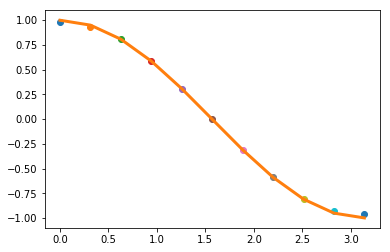

In [251]:
x=np.linspace(0,np.pi,n)
fig=plt.figure()
for i in range(len(y)):
    plt.plot(x[i],y[i], marker='o')
plt.plot(x,np.exp(-t*a)*np.cos(x+b*t),linewidth=3)
#plt.plot(x, y,linestyle=':',linewidth=5)

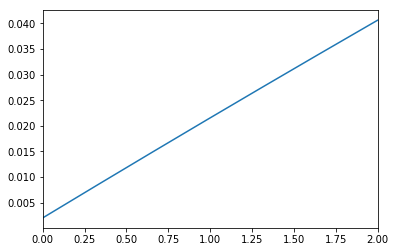

In [252]:
t1=np.linspace(0,ht*tau,ht)
plt.xlim(0,2)
plt.plot(t1,eps)